In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
!dir

 Volume in drive E is New Volume
 Volume Serial Number is 2260-FDF4

 Directory of E:\DS\1 Portofolio\Airplane Satisfaction

06/10/2023  22:09    <DIR>          .
24/09/2023  13:27    <DIR>          ..
24/09/2023  13:35    <DIR>          .ipynb_checkpoints
24/09/2023  13:27         2.841.945 archive.zip
24/09/2023  13:40        24.600.449 data raw.zip
01/10/2019  11:15        13.320.358 satisfaction.xlsx
01/10/2019  11:15        13.204.957 satisfaction_2015.xlsx
20/02/2020  16:51         3.037.688 test.csv
20/02/2020  16:51        12.193.089 train.csv
06/10/2023  22:09           906.024 Untitled.ipynb
               7 File(s)     70.104.510 bytes
               3 Dir(s)  122.867.892.224 bytes free


# Dataset

This dataset contains an airline passenger satisfaction survey. 
- What factors are highly correlated to a satisfied (or dissatisfied) passenger? 
- Can you predict passenger satisfaction?

- Gender: Gender of the passengers (Female, Male)

- Customer Type: The customer type (Loyal customer, disloyal customer)

- Age: The actual age of the passengers

- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

- Flight distance: The flight distance of this journey

- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

- Ease of Online booking: Satisfaction level of online booking

- Gate location: Satisfaction level of Gate location

- Food and drink: Satisfaction level of Food and drink

- Online boarding: Satisfaction level of online boarding

- Seat comfort: Satisfaction level of Seat comfort

- Inflight entertainment: Satisfaction level of inflight entertainment

- On-board service: Satisfaction level of On-board service

- Leg room service: Satisfaction level of Leg room service

- Baggage handling: Satisfaction level of baggage handling

- Check-in service: Satisfaction level of Check-in service

- Inflight service: Satisfaction level of inflight service

- Cleanliness: Satisfaction level of Cleanliness

- Departure Delay in Minutes: Minutes delayed when departure

- Arrival Delay in Minutes: Minutes delayed when Arrival

- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [3]:
df = pd.read_excel('satisfaction.xlsx')
df

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,119211,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,...,1,3,2,3,3,1,2,1,174,172.0
129877,125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,...,2,4,4,3,4,2,3,2,155,163.0
129878,251,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

# EDA

In [4]:
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [16]:
df['satisfaction_v2'].value_counts()

satisfaction_v2
satisfied                  71087
neutral or dissatisfied    58793
Name: count, dtype: int64

In [22]:
df.Gender.value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

In [23]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

In [43]:
df['Age'].describe()

count    129880.000000
mean         39.427957
std          15.119360
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

In [50]:
df.columns

Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [62]:
df.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [3]:
df.describe(exclude = ['float', 'int64'])

,satisfaction_v2,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880,129880
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,71087,65899,106100,89693,62160


In [3]:
df.isna().sum()

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
df[df['Arrival Delay in Minutes'].isna()]

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
145,61021,satisfied,Female,Loyal Customer,21,Personal Travel,Eco,4804,0,2,...,5,5,4,1,4,2,3,5,20,NaN
246,40480,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1364,0,3,...,4,2,1,1,3,4,3,2,0,NaN
710,19597,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1792,0,5,...,5,5,4,4,5,3,4,5,24,NaN
736,5411,satisfied,Male,Loyal Customer,9,Personal Travel,Eco,1862,0,5,...,3,3,5,3,4,4,4,3,0,NaN
818,3711,neutral or dissatisfied,Male,Loyal Customer,9,Personal Travel,Eco,1668,1,0,...,4,4,4,5,1,5,1,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127739,40434,satisfied,Male,Loyal Customer,44,Business travel,Business,3431,2,2,...,4,5,5,5,5,5,5,4,70,NaN
128131,120101,satisfied,Male,Loyal Customer,39,Business travel,Business,1595,4,4,...,5,5,5,5,5,3,5,5,0,NaN
128710,45676,satisfied,Female,Loyal Customer,45,Business travel,Eco,871,5,1,...,2,5,5,5,5,1,5,5,100,NaN
129774,44820,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,1594,5,4,...,3,3,1,4,3,3,4,3,0,NaN


In [4]:
# Dropna since nan amount is not much

df.dropna(axis=0, inplace=True)
df.shape

(129487, 24)

In [11]:
df.shape

(129487, 24)

In [5]:
# Dividing list of categorical and numerical columns

cat_columns = []
num_columns = []
for column in df.columns:
    if (df[column].dtype.name != 'int64') and (df[column].dtype.name != 'float64'):
        cat_columns.append(column)
    else:
        num_columns.append(column)
print(cat_columns)
print(num_columns) 

['satisfaction_v2', 'Gender', 'Customer Type', 'Type of Travel', 'Class']
['id', 'Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


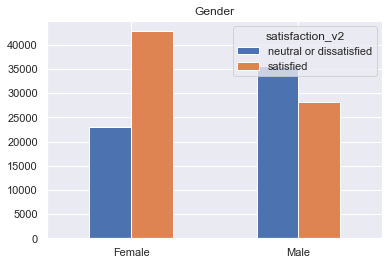

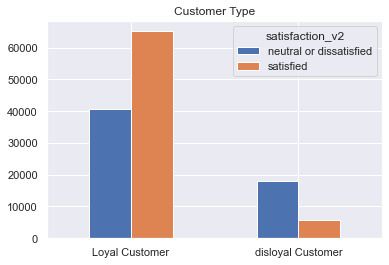

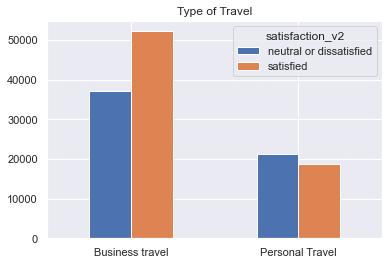

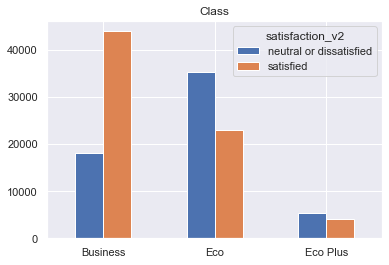

In [7]:
for col in cat_columns[1:]:
    df.groupby([col,'satisfaction_v2']).size().unstack().plot(kind='bar')
    plt.xticks(rotation=0)
    sns.set_theme()
    plt.title(col)
    plt.xlabel('')
    plt.show()

**Insight**

In [10]:
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [8]:
df.groupby(['satisfaction_v2'])['Flight Distance'].size().reset_index()

,satisfaction_v2,Flight Distance
0,neutral or dissatisfied,58605
1,satisfied,70882


In [9]:
# define rating numerical columns

rating_columns = ['Seat comfort','Departure/Arrival time convenient','Food and drink',
                  'Gate location','Inflight wifi service','Inflight entertainment','Online support',
                  'Ease of Online booking','On-board service','Leg room service','Baggage handling',
                  'Checkin service','Cleanliness','Online boarding']
len(rating_columns)

14

In [10]:
# define continous numerical columns

cont_columns = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

<AxesSubplot:xlabel='Age', ylabel='Count'>

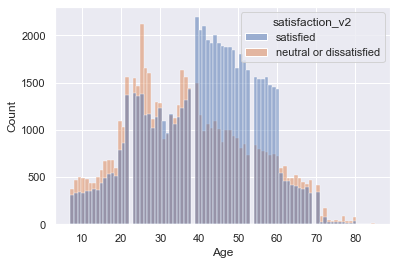

In [11]:
sns.histplot(data=df, x='Age', hue='satisfaction_v2')

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

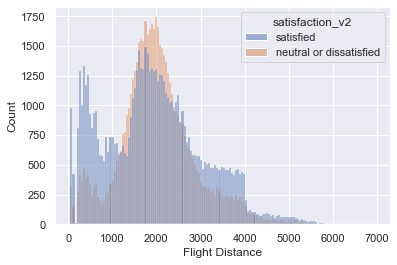

In [12]:
sns.histplot(data=df, x='Flight Distance', hue='satisfaction_v2')

Age columns has no correlations with customer satisfactions, it will be deleted

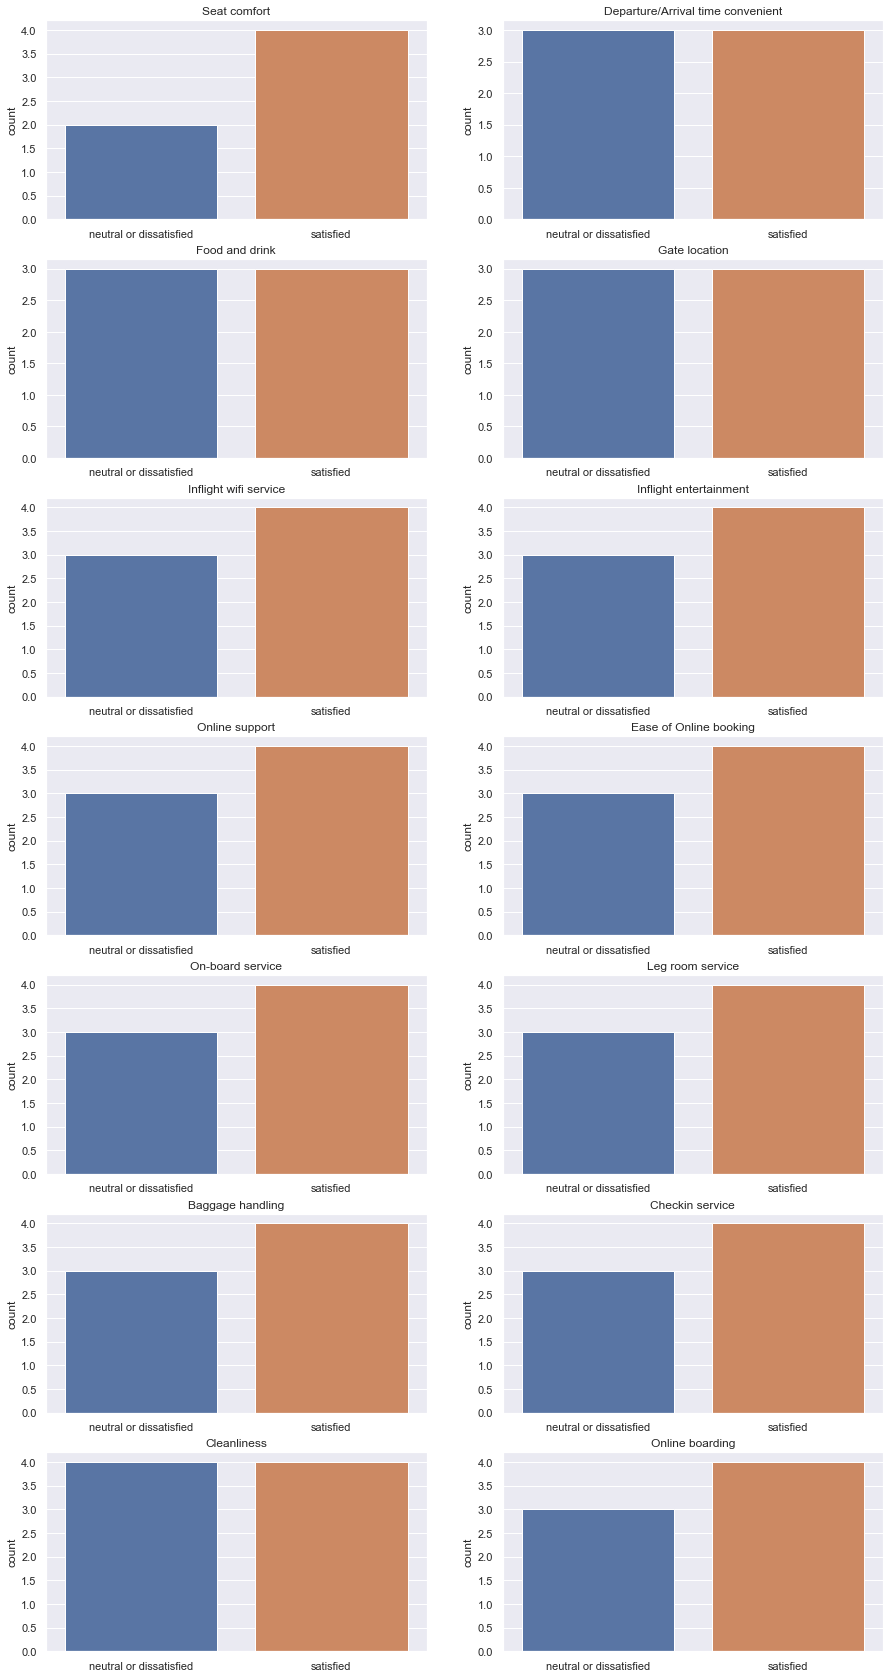

In [67]:
fig, ax = plt.subplots(7,2, figsize=(15,30))
idx = 0
for x in range(7):
    for y in range(2):
        sns.barplot(data=df.groupby(['satisfaction_v2'])[rating_columns[idx]].median().reset_index(), 
                    x='satisfaction_v2',y=rating_columns[idx], ax=ax[x][y])
        ax[x][y].set_title(rating_columns[idx])
        ax[x][y].set_xlabel('')
        ax[x][y].set_ylabel('count')
        idx += 1
        plt.tight_layout
plt.show()

In [65]:
print(num_columns)

['id', 'Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


Columns **'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Cleanliness'** didn't have significant impact to customer satisfied, these will be deleted

## Delay Variables

### Departure Delay in Minutes

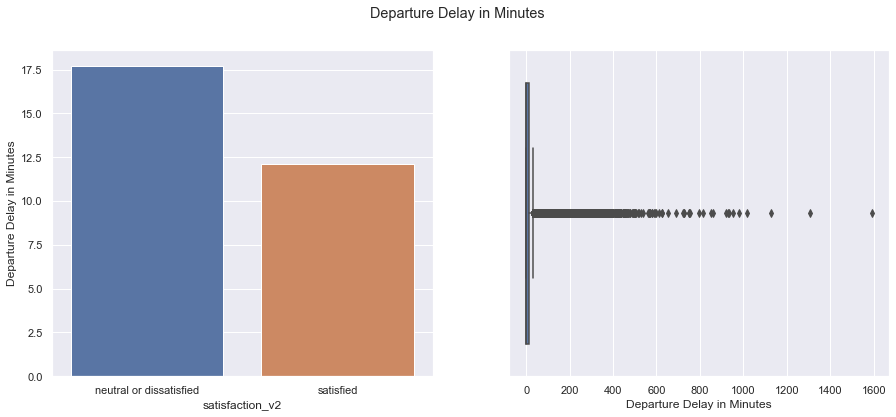

In [102]:
# 'Departure Delay in Minutes'

fig, ax = plt.subplots(1,2, figsize=(15,6))
# print(ax[0])
sns.barplot(data=df.groupby(['satisfaction_v2'])['Departure Delay in Minutes'].mean().reset_index(),
            x='satisfaction_v2',y='Departure Delay in Minutes', ax=ax[0])

sns.boxplot(data=df, x='Departure Delay in Minutes', hue='satisfaction_v2', ax=ax[1])

plt.suptitle('Departure Delay in Minutes')

plt.show()

### Arrival Delay in Minutes

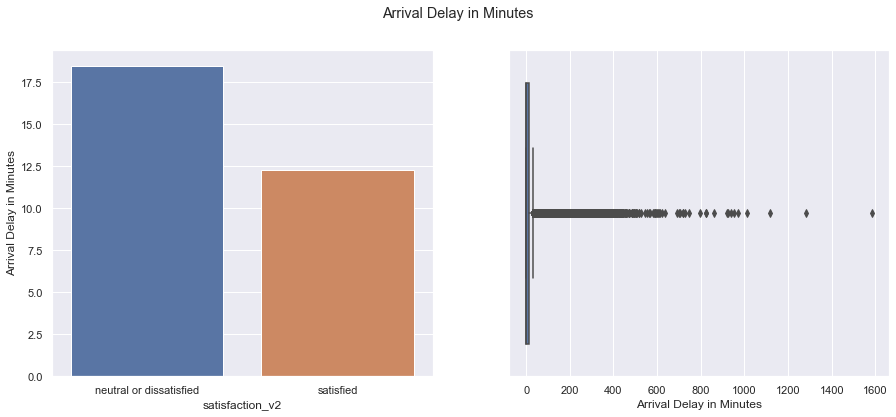

In [101]:
# 'Arrival Delay in Minutes'

fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.barplot(data=df.groupby(['satisfaction_v2'])['Arrival Delay in Minutes'].mean().reset_index(),
            x='satisfaction_v2',y='Arrival Delay in Minutes', ax=ax[0])

sns.boxplot(data=df, x='Arrival Delay in Minutes', hue='satisfaction_v2', ax=ax[1])

plt.suptitle('Arrival Delay in Minutes')
plt.show()

The bigger delay time, the more customers feel dissatisfied

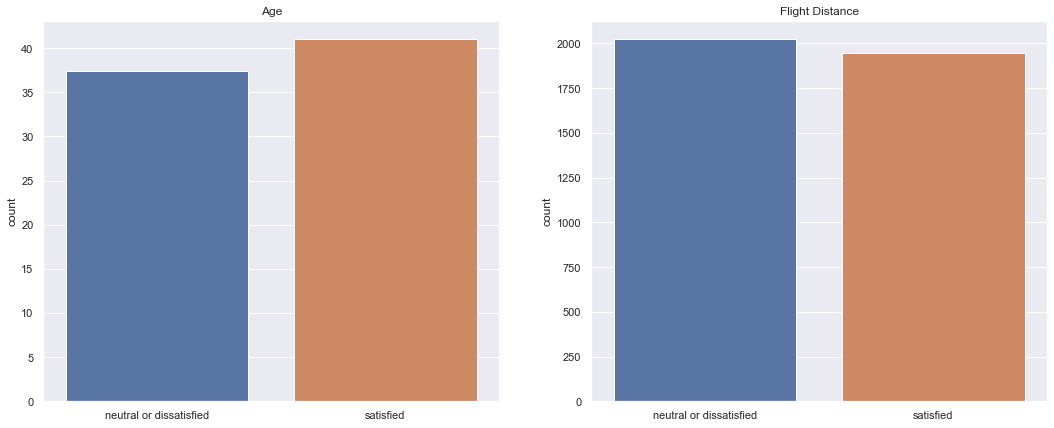

In [107]:
fig, ax = plt.subplots(1,2, figsize=(18,7))

sns.barplot(data=df.groupby(['satisfaction_v2'])['Age'].mean().reset_index(), 
            x='satisfaction_v2',y='Age', ax=ax[0])
ax[0].set_title('Age')
ax[0].set_xlabel('')
ax[0].set_ylabel('count')

sns.barplot(data=df.groupby(['satisfaction_v2'])['Flight Distance'].mean().reset_index(), 
            x='satisfaction_v2',y='Flight Distance', ax=ax[1])
ax[1].set_title('Flight Distance')
ax[1].set_xlabel('')
ax[1].set_ylabel('count')

plt.tight_layout
plt.show()

Age variable seems has no correlations or impact to customer satisfaction, the proportions between satisfactions category are similar

<AxesSubplot:>

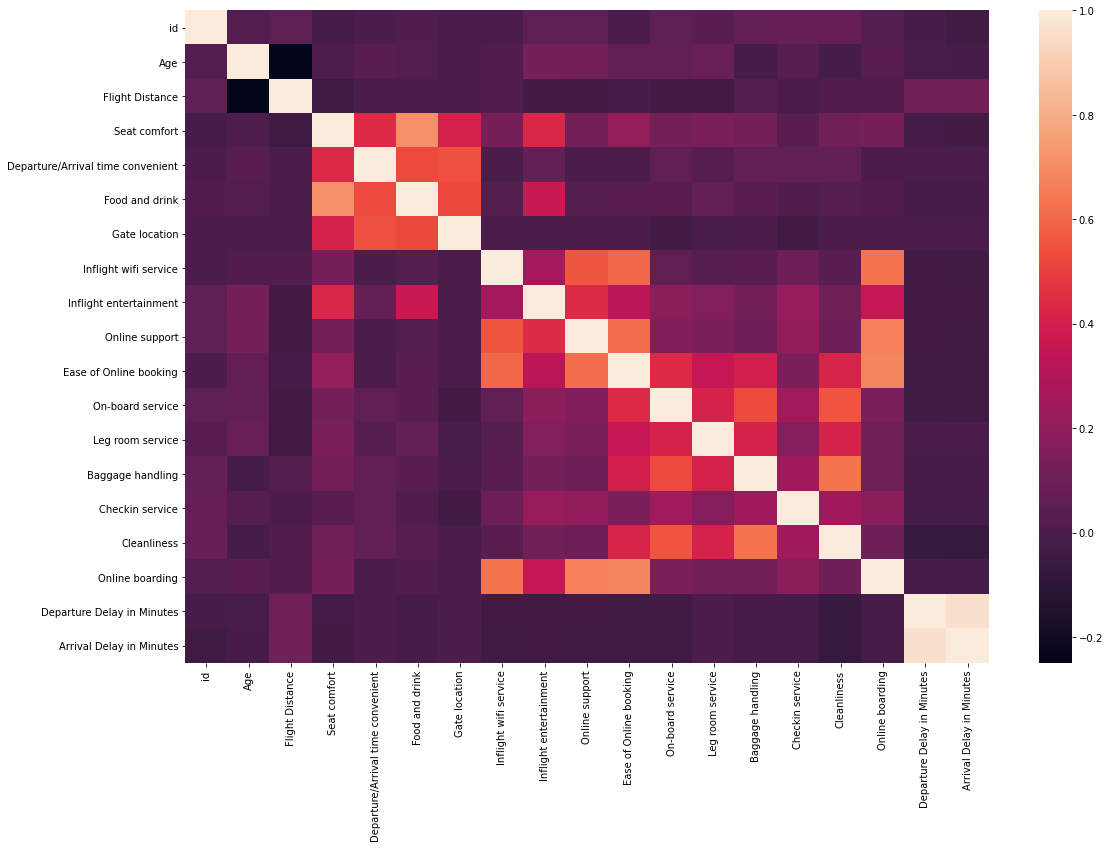

In [30]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(numeric_only = True))

In [31]:
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


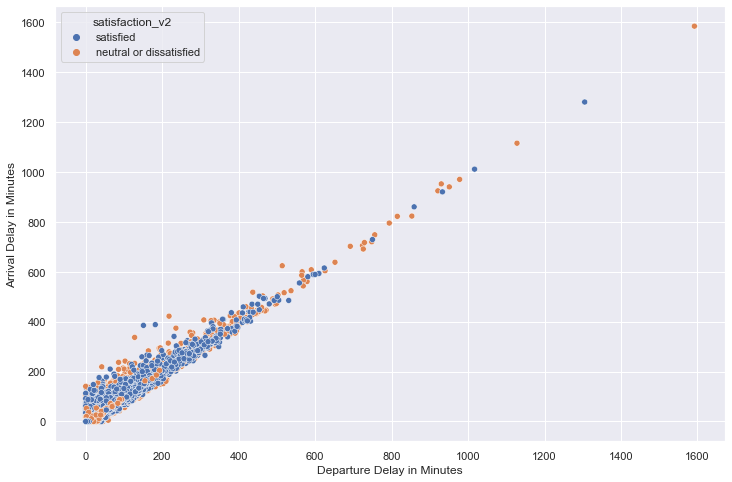

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Departure Delay in Minutes', y='Arrival Delay in Minutes', hue='satisfaction_v2')
sns.set_theme()

## Drop unnecessary columns

In [12]:
unused_columns = ['Gender','id','Age','Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Cleanliness']

In [13]:
df.rename(columns = {'satisfaction_v2' : 'satisfaction'},inplace=True)

In [14]:
df.drop(columns=unused_columns,inplace=True)
df.head()

,satisfaction,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,Personal Travel,Eco,265,0,2,4,2,3,3,0,3,5,2,0,0.0
1,satisfied,Loyal Customer,Personal Travel,Business,2464,0,0,2,2,3,4,4,4,2,2,310,305.0
2,satisfied,Loyal Customer,Personal Travel,Eco,2138,0,2,0,2,2,3,3,4,4,2,0,0.0
3,satisfied,Loyal Customer,Personal Travel,Eco,623,0,3,4,3,1,1,0,1,4,3,0,0.0
4,satisfied,Loyal Customer,Personal Travel,Eco,354,0,4,3,4,2,2,0,2,4,5,0,0.0


In [15]:
df.shape

(129487, 17)

In [16]:
rating_columns2 = [item for item in rating_columns if item not in unused_columns]
rating_columns2

['Seat comfort',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Online boarding']

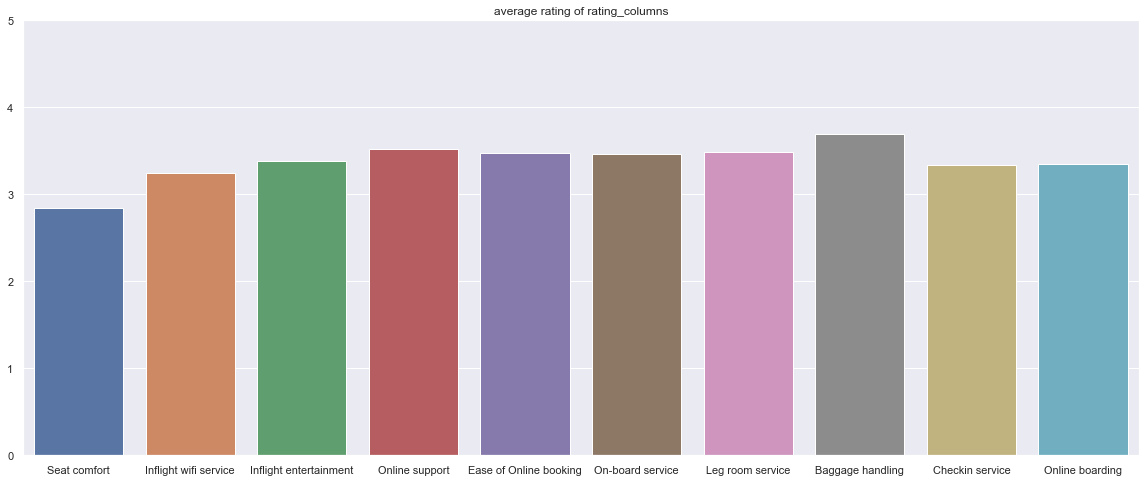

In [17]:
plt.figure(figsize=(20,8))
sns.barplot(
    x=rating_columns2, y=[df[col].mean() for col in rating_columns2]
)
plt.title('average rating of rating_columns')
plt.ylim(ymax=5)
plt.show()

the average of customer ratings for each variables are relatively values in 3

In [51]:
df.head()

,satisfaction,Gender,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,265,0,2,4,2,3,3,0,3,5,2,0,0.0
1,satisfied,Male,Loyal Customer,Personal Travel,Business,2464,0,0,2,2,3,4,4,4,2,2,310,305.0
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,2138,0,2,0,2,2,3,3,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,623,0,3,4,3,1,1,0,1,4,3,0,0.0
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,354,0,4,3,4,2,2,0,2,4,5,0,0.0


## Outliers analysis and handling

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Departure Delay in Minutes'>

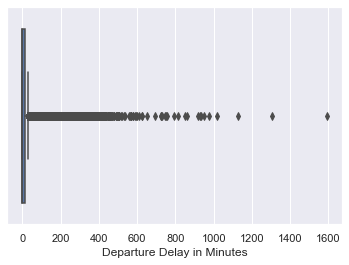

In [53]:
sns.boxplot(df['Departure Delay in Minutes'])

In [54]:
df['Departure Delay in Minutes'].mean()

14.643385050236704

In [61]:
df[df['Departure Delay in Minutes'] > 700]

,satisfaction,Gender,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
3539,neutral or dissatisfied,Female,Loyal Customer,Personal Travel,Eco,2460,1,1,5,5,3,4,4,5,5,5,794,795.0
3758,neutral or dissatisfied,Male,Loyal Customer,Personal Travel,Eco,3468,1,1,1,1,5,3,4,4,1,1,978,970.0
5741,neutral or dissatisfied,Female,Loyal Customer,Personal Travel,Eco,1990,1,0,4,4,4,4,5,1,4,4,724,705.0
5801,neutral or dissatisfied,Male,Loyal Customer,Personal Travel,Eco,2832,1,0,1,1,4,2,5,5,1,1,726,691.0
9704,neutral or dissatisfied,Female,Loyal Customer,Personal Travel,Eco,3113,2,2,4,2,2,4,4,4,2,2,1592,1584.0
17110,neutral or dissatisfied,Male,Loyal Customer,Personal Travel,Eco,3017,2,2,1,1,4,4,3,5,1,1,1128,1115.0
52728,neutral or dissatisfied,Male,disloyal Customer,Business travel,Business,2478,3,3,5,5,5,4,5,5,5,5,921,924.0
67029,neutral or dissatisfied,Female,Loyal Customer,Business travel,Business,3549,1,1,1,1,2,1,3,3,1,1,951,940.0
73014,neutral or dissatisfied,Male,Loyal Customer,Business travel,Business,5865,2,2,2,2,2,2,4,3,2,2,853,823.0
73025,neutral or dissatisfied,Male,Loyal Customer,Business travel,Business,2895,2,2,2,2,2,4,3,3,2,2,729,717.0


In [78]:
q1=df['Departure Delay in Minutes'].quantile(0.25)

q3=df['Departure Delay in Minutes'].quantile(0.75)

IQR=q3-q1

df_outliers = df[(df['Departure Delay in Minutes'] > df['Departure Delay in Minutes'].quantile(0.98))]

In [79]:
df_outliers

,satisfaction,Gender,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
1,satisfied,Male,Loyal Customer,Personal Travel,Business,2464,0,0,2,2,3,4,4,4,2,2,310,305.0
41,satisfied,Female,Loyal Customer,Personal Travel,Eco,2748,0,1,4,4,3,1,3,4,4,4,427,440.0
226,satisfied,Female,Loyal Customer,Personal Travel,Eco,1950,0,0,3,3,4,3,4,4,3,3,151,214.0
243,satisfied,Female,Loyal Customer,Personal Travel,Eco,2073,0,0,2,2,4,2,1,2,2,2,140,137.0
460,satisfied,Male,Loyal Customer,Personal Travel,Eco,2391,0,0,2,2,3,3,5,5,2,2,158,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129625,satisfied,Female,Loyal Customer,Business travel,Business,4260,2,5,5,5,4,3,5,4,5,5,179,172.0
129876,neutral or dissatisfied,Male,disloyal Customer,Personal Travel,Business,2087,2,2,1,1,3,2,3,3,1,1,174,172.0
129877,neutral or dissatisfied,Male,disloyal Customer,Personal Travel,Eco,2320,3,3,2,2,4,4,3,4,2,2,155,163.0
129878,neutral or dissatisfied,Male,disloyal Customer,Personal Travel,Eco,2450,3,3,2,2,3,3,2,3,2,2,193,205.0


In [80]:
df_outliers['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    1628
satisfied                   927
Name: count, dtype: int64

Delay time affects the customer satisfaction, so in this case outlier will be tried to be used and not be deleted

# Preprocessing

In [17]:
df_encode = df.copy()
df_encode.head()

,satisfaction,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,Personal Travel,Eco,265,0,2,4,2,3,3,0,3,5,2,0,0.0
1,satisfied,Loyal Customer,Personal Travel,Business,2464,0,0,2,2,3,4,4,4,2,2,310,305.0
2,satisfied,Loyal Customer,Personal Travel,Eco,2138,0,2,0,2,2,3,3,4,4,2,0,0.0
3,satisfied,Loyal Customer,Personal Travel,Eco,623,0,3,4,3,1,1,0,1,4,3,0,0.0
4,satisfied,Loyal Customer,Personal Travel,Eco,354,0,4,3,4,2,2,0,2,4,5,0,0.0


## Encoding

In [18]:
df_encode['satisfaction'] = df_encode['satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})
df_encode['Customer Type'] = df_encode['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})
df_encode['Type of Travel'] = df_encode['Type of Travel'].map({'Business travel':1,'Personal Travel':0})
df_encode['Class'] = df_encode['Class'].map({'Business':2,'Eco Plus':1,'Eco':0})

In [19]:
df_encode

,satisfaction,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,0,265,0,2,4,2,3,3,0,3,5,2,0,0.0
1,1,1,0,2,2464,0,0,2,2,3,4,4,4,2,2,310,305.0
2,1,1,0,0,2138,0,2,0,2,2,3,3,4,4,2,0,0.0
3,1,1,0,0,623,0,3,4,3,1,1,0,1,4,3,0,0.0
4,1,1,0,0,354,0,4,3,4,2,2,0,2,4,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,0,0,1731,5,2,5,2,2,3,3,4,4,2,0,0.0
129876,0,0,0,2,2087,2,2,1,1,3,2,3,3,1,1,174,172.0
129877,0,0,0,0,2320,3,3,2,2,4,4,3,4,2,2,155,163.0
129878,0,0,0,0,2450,3,3,2,2,3,3,2,3,2,2,193,205.0


## Feature Scaling

In [20]:
X = df_encode.drop(columns='satisfaction')
y = df_encode['satisfaction']

In [21]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X,y, test_size=0.1, random_state=123)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
# y = np.array(df_encode['Balance']).reshape(-1,1)
columns = list(X_train.columns)
scaler.fit(X_train[columns])

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train[columns] = X_train_scaled
X_test[columns] = X_test_scaled

<ipython-input-24-58aa86ffdd58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[columns] = X_train_scaled
<ipython-input-24-58aa86ffdd58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[columns] = X_test_scaled


In [25]:
X_test.shape

(12949, 16)

## Class Proportion Check

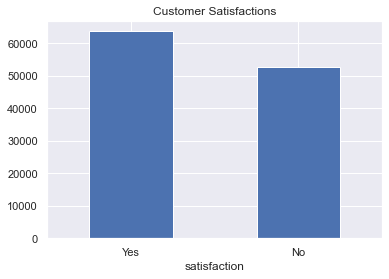

In [28]:
y_train.value_counts().plot(kind='bar')
plt.xticks([1,0],['No','Yes'], rotation=0)
plt.title('Customer Satisfactions')
sns.set_theme()

The proportions of class is almost balanced

## Modeling

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [124]:
clf = SVC(C=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print('SVC Polos : ', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('precision', precision_score(y_test,y_pred))
print('recall', recall_score(y_test,y_pred))
print('f1_score', f1_score(y_test,y_pred))
print('Roc_AUC', roc_auc_score(y_test,y_pred))

SVC Polos :  0.9223878291759982
[[5384  443]
 [ 562 6560]]
precision 0.9367413965443382
recall 0.9210895815782084
f1_score 0.928849557522124
Roc_AUC 0.9225320912867875


### Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)


print('RandomForest : ', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred, labels=[1,0]))
print('precision', precision_score(y_test,y_pred))
print('recall', recall_score(y_test,y_pred))
print('f1_score', f1_score(y_test,y_pred))

RandomForest :  0.9414626612093598
[[6659  463]
 [ 295 5532]]
precision 0.9575783721599079
recall 0.9349901713001966
f1_score 0.9461494742824667


In [59]:
dict_coef_dct = {'columns':list(X_train.columns),
             'coef_dct':rfc.feature_importances_}
df_coef_dct = pd.DataFrame(dict_coef_dct).sort_values(by='coef_dct', ascending=False)

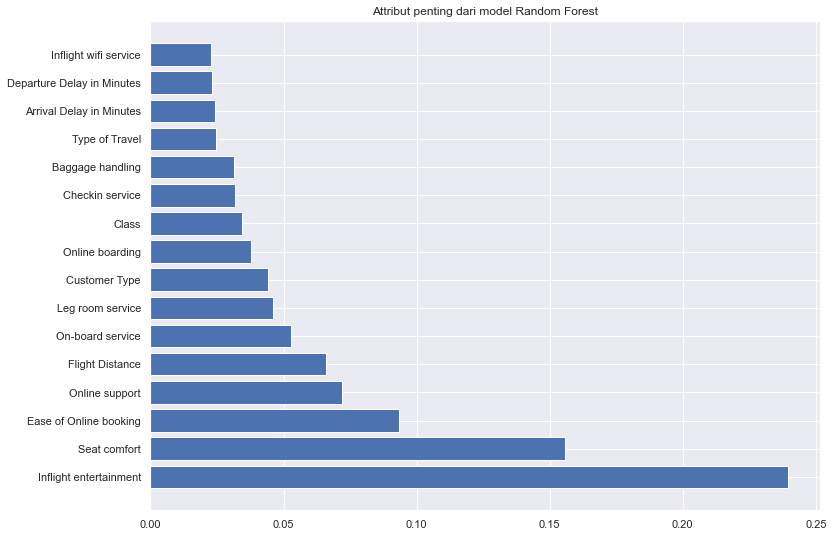

In [60]:
plt.figure(figsize=(12,9))
plt.barh(data=df_coef_dct, y='columns', width='coef_dct')
sns.set_theme()
plt.title('Attribut penting dari model Random Forest')
plt.show()

## XGB Model

In [45]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=50, learning_rate=0.1,use_label_encoder=False)
xgb.fit(X_train.values,y_train)

y_pred = xgb.predict(X_test)

print('RandomForest : ', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred, labels=[1,0]))
print('precision', precision_score(y_test,y_pred))
print('recall', recall_score(y_test,y_pred))
print('f1_score', f1_score(y_test,y_pred))

[12:35:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
RandomForest :  0.9232373156228281
[[6547  575]
 [ 419 5408]]
precision 0.9398507034165949
recall 0.9192642516147149
f1_score 0.9294434980124928


In [56]:
dict_coef_xgb = {'columns':list(X_train.columns),
             'coef_xgb':xgb.feature_importances_}
df_coef_xgb = pd.DataFrame(dict_coef_xgb).sort_values(by='coef_xgb', ascending=False)

In [58]:
plt.barh?

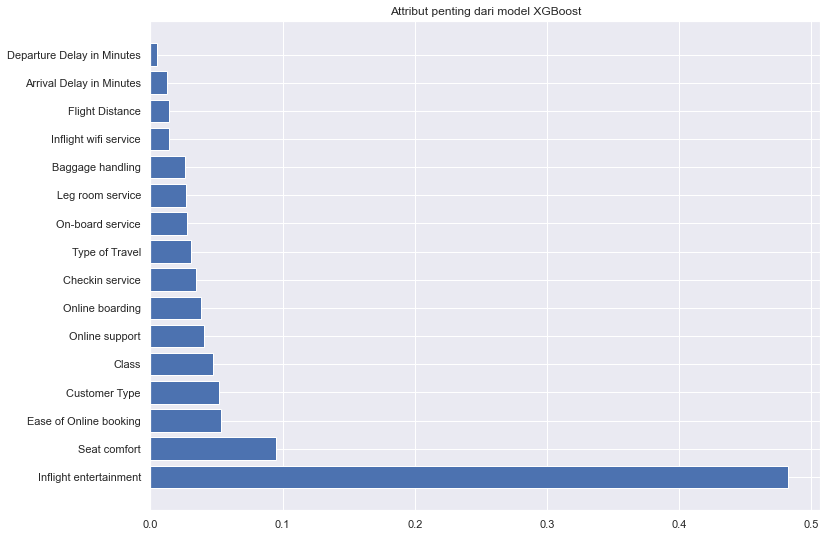

In [62]:
plt.figure(figsize=(12,9))
plt.barh(data=df_coef_xgb, y='columns', width='coef_xgb')
sns.set_theme()
plt.title('Attribut penting dari model XGBoost')
plt.show()

From the first random forest and xgboost model, we can inferred that `inflight entertainment` has the highest impact for the customer satisfaction models, and the variables that have less impact to customer satisfaction is delay minute, both in arrival and departure

for the second modeling experiments, outlier in arrival and departure variables will be deleted and handled in order to find more accuracy and performances of the models

# Second Modeling

In [67]:
df_encode2 = df_encode.copy()
df_encode2

,satisfaction,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,0,265,0,2,4,2,3,3,0,3,5,2,0,0.0
1,1,1,0,2,2464,0,0,2,2,3,4,4,4,2,2,310,305.0
2,1,1,0,0,2138,0,2,0,2,2,3,3,4,4,2,0,0.0
3,1,1,0,0,623,0,3,4,3,1,1,0,1,4,3,0,0.0
4,1,1,0,0,354,0,4,3,4,2,2,0,2,4,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,0,0,1731,5,2,5,2,2,3,3,4,4,2,0,0.0
129876,0,0,0,2,2087,2,2,1,1,3,2,3,3,1,1,174,172.0
129877,0,0,0,0,2320,3,3,2,2,4,4,3,4,2,2,155,163.0
129878,0,0,0,0,2450,3,3,2,2,3,3,2,3,2,2,193,205.0


### Outliers handling

In [74]:
df_encode2.head()

,satisfaction,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,0,265,0,2,4,2,3,3,0,3,5,2,0,0.0
1,1,1,0,2,2464,0,0,2,2,3,4,4,4,2,2,310,305.0
2,1,1,0,0,2138,0,2,0,2,2,3,3,4,4,2,0,0.0
3,1,1,0,0,623,0,3,4,3,1,1,0,1,4,3,0,0.0
4,1,1,0,0,354,0,4,3,4,2,2,0,2,4,5,0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Arrival Delay in Minutes'>

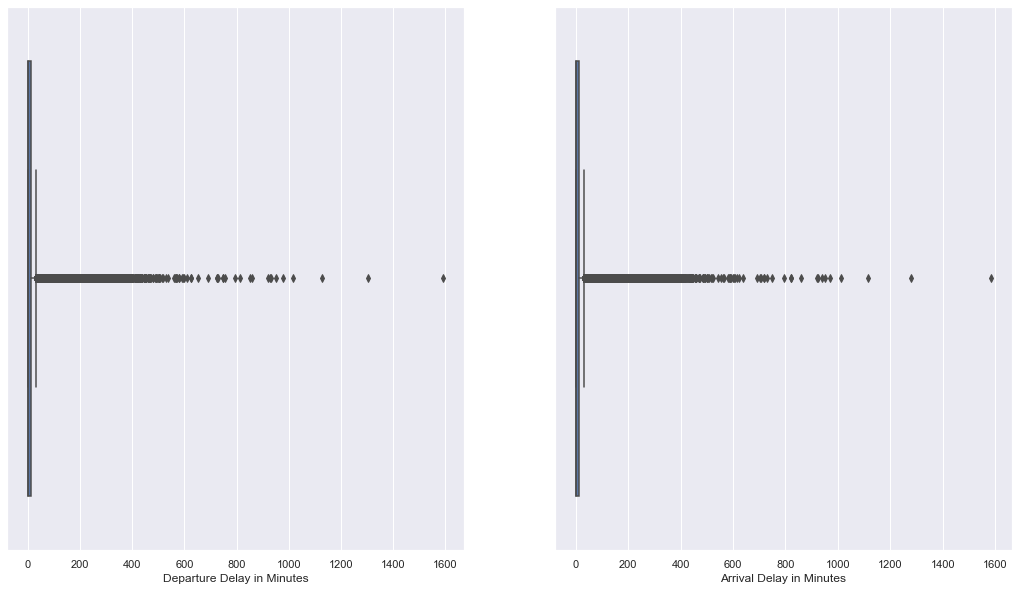

In [91]:
fig, ax = plt.subplots(1,2, figsize=(18,10))
sns.boxplot(df_encode2['Departure Delay in Minutes'], ax=ax[0])
sns.boxplot(df_encode2['Arrival Delay in Minutes'], ax=ax[1])

In [110]:
q1=df_encode2['Departure Delay in Minutes'].quantile(0.25)

q3=df_encode2['Departure Delay in Minutes'].quantile(0.75)

IQR=q3-q1

df_outliers = df_encode2[(df_encode2['Departure Delay in Minutes'] >= 600)]

In [115]:
# data withous outlier

df_no_outliers = df_encode2[~(df_encode2['Departure Delay in Minutes'] >= 600)]
df_no_outliers

,satisfaction,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,0,265,0,2,4,2,3,3,0,3,5,2,0,0.0
1,1,1,0,2,2464,0,0,2,2,3,4,4,4,2,2,310,305.0
2,1,1,0,0,2138,0,2,0,2,2,3,3,4,4,2,0,0.0
3,1,1,0,0,623,0,3,4,3,1,1,0,1,4,3,0,0.0
4,1,1,0,0,354,0,4,3,4,2,2,0,2,4,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,0,0,1731,5,2,5,2,2,3,3,4,4,2,0,0.0
129876,0,0,0,2,2087,2,2,1,1,3,2,3,3,1,1,174,172.0
129877,0,0,0,0,2320,3,3,2,2,4,4,3,4,2,2,155,163.0
129878,0,0,0,0,2450,3,3,2,2,3,3,2,3,2,2,193,205.0


In [116]:
# data outlier
df_outliers

,satisfaction,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
3539,0,1,0,0,2460,1,1,5,5,3,4,4,5,5,5,794,795.0
3758,0,1,0,0,3468,1,1,1,1,5,3,4,4,1,1,978,970.0
4778,0,1,0,0,4318,1,1,1,1,3,3,2,2,1,1,626,604.0
5741,0,1,0,0,1990,1,0,4,4,4,4,5,1,4,4,724,705.0
5801,0,1,0,0,2832,1,0,1,1,4,2,5,5,1,1,726,691.0
9704,0,1,0,0,3113,2,2,4,2,2,4,4,4,2,2,1592,1584.0
10883,0,1,0,2,2256,2,2,3,3,1,3,3,2,3,3,692,702.0
17110,0,1,0,0,3017,2,2,1,1,4,4,3,5,1,1,1128,1115.0
52728,0,0,1,2,2478,3,3,5,5,5,4,5,5,5,5,921,924.0
54202,0,0,1,0,2431,3,3,4,4,5,3,1,5,4,4,652,638.0


Minutes of depart and arrival delay is similar

In [98]:
# Check difference between depart and arrival delay

abs(df_encode2['Departure Delay in Minutes'] - df_encode2['Arrival Delay in Minutes']).mean()

4.974777390780542

the difference between depart and arrival delay is about 5, it seems that those features have similar minutes as depart delay will automatically affects the arrival delay

In [88]:
df_encode2[(df_encode2['Departure Delay in Minutes'] == 0)]['satisfaction'].value_counts()

satisfaction
1    41908
0    31301
Name: count, dtype: int64

In [89]:
df_encode2[(df_encode2['Departure Delay in Minutes'] != 0)]['satisfaction'].value_counts()

satisfaction
1    28974
0    27304
Name: count, dtype: int64

## Preprocessing & Modeling

## Feature Scaling

In [118]:
X = df_no_outliers.drop(columns='satisfaction')
y = df_no_outliers['satisfaction']

In [121]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X,y, test_size=0.1, random_state=123)

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
scaler = MinMaxScaler()
# y = np.array(df_encode['Balance']).reshape(-1,1)
columns = list(X_train.columns)
scaler.fit(X_train[columns])

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
X_train[columns] = X_train_scaled
X_test[columns] = X_test_scaled

<ipython-input-124-58aa86ffdd58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[columns] = X_train_scaled
<ipython-input-124-58aa86ffdd58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[columns] = X_test_scaled


In [126]:
X_train.shape

(116515, 16)

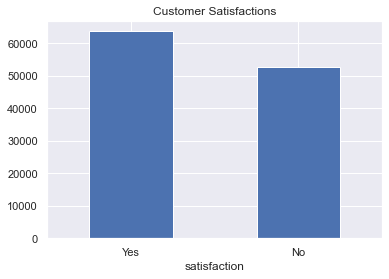

In [127]:
y_train.value_counts().plot(kind='bar')
plt.xticks([1,0],['No','Yes'], rotation=0)
plt.title('Customer Satisfactions')
sns.set_theme()

In [128]:
X_train

,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
123446,1.0,1.0,1.0,0.052891,0.2,1.0,1.0,1.0,1.0,1.0,1.0,1.00,0.6,0.8,0.000000,0.000000
112188,1.0,1.0,1.0,0.163744,0.6,0.4,0.8,0.8,0.8,0.8,1.0,0.75,0.6,1.0,0.003361,0.000000
90742,1.0,1.0,1.0,0.447906,0.8,0.8,0.8,0.8,0.8,0.4,0.2,0.25,0.8,0.8,0.000000,0.000000
35072,1.0,0.0,0.0,0.267063,0.8,0.6,0.8,1.0,0.6,1.0,1.0,1.00,0.6,0.6,0.015126,0.083333
18446,1.0,0.0,0.0,0.190987,0.4,0.8,0.4,0.8,0.8,1.0,0.4,1.00,0.8,0.8,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61616,0.0,1.0,1.0,0.310100,1.0,0.4,1.0,0.4,0.4,0.6,0.6,1.00,1.0,0.4,0.168067,0.147436
17811,1.0,0.0,1.0,0.367048,0.4,0.6,0.4,0.6,0.6,0.6,0.4,1.00,0.6,0.6,0.000000,0.011218
28139,1.0,0.0,0.0,0.317925,0.4,0.8,0.8,1.0,1.0,1.0,1.0,1.00,0.8,1.0,0.183193,0.179487
15798,1.0,0.0,0.0,0.206492,0.8,0.4,0.6,0.8,0.8,0.8,0.8,0.75,0.4,0.4,0.003361,0.000000


In [129]:
X_test.shape

(12947, 16)

### Random Forest Model

In [130]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

print('RandomForest : ', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred, labels=[1,0]))
print('precision', precision_score(y_test,y_pred))
print('recall', recall_score(y_test,y_pred))
print('f1_score', f1_score(y_test,y_pred))

RandomForest :  0.9426894261218816
[[6741  410]
 [ 332 5464]]
precision 0.9530609359536265
recall 0.9426653614879038
f1_score 0.9478346456692913


In [131]:
dict_coef_dct = {'columns':list(X_train.columns),
             'coef_dct':rfc.feature_importances_}
df_coef_dct = pd.DataFrame(dict_coef_dct).sort_values(by='coef_dct', ascending=False)

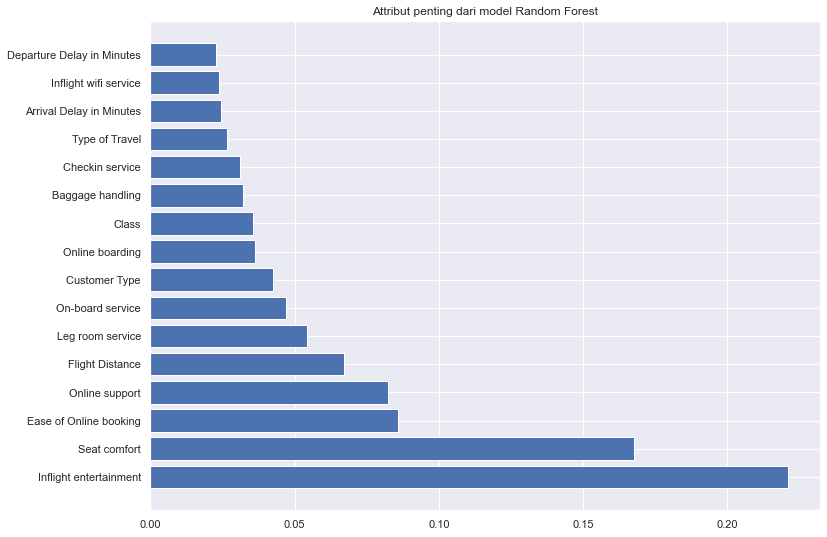

In [132]:
plt.figure(figsize=(12,9))
plt.barh(data=df_coef_dct, y='columns', width='coef_dct')
sns.set_theme()
plt.title('Attribut penting dari model Random Forest')
plt.show()